# The Grand Hackathon 2.0 !!!

## Team Name: hack 'o holics

Anxiety and stress make your heart work harder. When you’re under stress your body’s “fight or flight” response is triggered i.e. your body tenses, your blood pressure rises and your heart beats faster. Stress hormones may damage the lining of the arteries. In the current scenario post-covid, since most of us are indoors, stress levels are at an all time high due to increasing anxieties which is leading to a higher heart rate. And your body's response to stress may be a headache, back strain, or stomach pains. Stress can also zap your energy, wreak havoc on your sleep and make you feel cranky, forgetful and out of control.

Higher heart rate is not always better since pathological conditions can lead to an increased heart rate. Tachycardia refers to a fast resting heart rate, usually over 100 beats per minute. Tachycardia can be dangerous, depending on its underlying cause and on how hard the heart has to work. 

An optimal level of heart rate is associated with health and self-regulatory capacity, and adaptability or resilience. Higher levels of resting vagally-mediated heart rate are linked to performance of executive functions like attention and emotional processing by the prefrontal cortex.

Higher heart rates are usually connected with higher stress levels. When stress is excessive, it can contribute to everything from high blood pressure, also called hypertension, to asthma to ulcers to irritable bowel syndrome

Stress may affect behaviors and factors that increase heart disease risk: high blood pressure and cholesterol levels, smoking, physical inactivity and overeating. Some people may choose to drink too much alcohol or smoke cigarettes to “manage” their chronic stress, however these habits can increase blood pressure and may damage artery walls.
 
Thus, heart rate can be used to monitor your stress levels and keep it under check as it is a useful indicator of good health.
A recent study speaks about effects of stress on increased heart attacks amongst 30-40 year olds:

## EDA

In [1]:
import os,sys
import pandas as pd
import numpy as np
from scipy import stats
# importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
sns.distributions._has_statsmodels=False
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, classification_report, confusion_matrix,auc
from sklearn.metrics import recall_score,precision_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Set color code,font scale..
sns.set(color_codes=True,rc={'figure.figsize':(35.0,35.0)},font_scale=1)
%matplotlib inline 


df1 = pd.read_csv(r"frequency_domain_features_train.csv")
df2 = pd.read_csv(r"heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv(r"time_domain_features_train.csv")

object_columns_list = list(df1.select_dtypes(include='object').columns)

for object_column in object_columns_list:
    df1[object_column] = df1[object_column].astype(str)

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uuid     369289 non-null  object 
 1   VLF      369289 non-null  float64
 2   VLF_PCT  369289 non-null  float64
 3   LF       369289 non-null  float64
 4   LF_PCT   369289 non-null  float64
 5   LF_NU    369289 non-null  float64
 6   HF       369289 non-null  float64
 7   HF_PCT   369289 non-null  float64
 8   HF_NU    369289 non-null  float64
 9   TP       369289 non-null  float64
 10  LF_HF    369289 non-null  float64
 11  HF_LF    369289 non-null  float64
dtypes: float64(11), object(1)
memory usage: 33.8+ MB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       369289 non-null  object 
 1   SD1        369289 non-null  float64
 2   SD2        369289 non-null  float64
 3   sampen     369289 non-null  float64
 4   higuci     369289 non-null  float64
 5   datasetId  369289 non-null  int64  
 6   condition  369289 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ MB


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [5]:
mid_res = pd.merge(df1,df2,how='outer',on='uuid') 
result = pd.merge(mid_res,df3,how='outer',on='uuid')

In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

In [7]:
result.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252


In [8]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

num_bins = 10

In [9]:
result.dtypes

uuid                  object
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
SD1                  float64
SD2                  float64
sampen               float64
higuci               float64
datasetId              int64
condition             object
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL

In [10]:
result.condition

0            no stress
1         interruption
2         interruption
3            no stress
4            no stress
              ...     
369284       no stress
369285       no stress
369286       no stress
369287       no stress
369288       no stress
Name: condition, Length: 369289, dtype: object

In [11]:
result['condition'].value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [12]:
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


In [13]:
dfTest = result.pop('HR')
result['HR']=dfTest
result.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,HR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,69.499952
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,64.363150
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,67.450066
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,68.809562
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,74.565728


In [14]:
result.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
HR                   0
dtype: int64

In [15]:
#Unique Values

display(result.nunique())

uuid                 369289
VLF                  369289
VLF_PCT              369289
LF                   369289
LF_PCT               369289
LF_NU                369289
HF                   369289
HF_PCT               369289
HF_NU                369289
TP                   369289
LF_HF                369289
HF_LF                369289
SD1                  369289
SD2                  369289
sampen                82511
higuci               369289
datasetId                 1
condition                 3
MEAN_RR              369289
MEDIAN_RR            106329
SDRR                 369289
RMSSD                369289
SDSD                 369289
SDRR_RMSSD           369289
pNN25                   592
pNN50                    83
KURT                 369289
SKEW                 369289
MEAN_REL_RR          369289
MEDIAN_REL_RR         25041
SDRR_REL_RR          369289
RMSSD_REL_RR         369289
SDSD_REL_RR          369289
SDRR_RMSSD_REL_RR    369289
KURT_REL_RR          369289
SKEW_REL_RR         

In [16]:
category_variables=[col for col in result.columns if result[col].nunique()<=5]
print("Category Variables")
print(category_variables)

print()

print("Contniue Variables")
continue_variables=[col for col in result.columns if result[col].nunique()>5]
print(continue_variables)
continue_variables.remove('uuid')
print(continue_variables)

Category Variables
['datasetId', 'condition']

Contniue Variables
['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'HR']
['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'HR']


In [17]:
result.dtypes

uuid                  object
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
SD1                  float64
SD2                  float64
sampen               float64
higuci               float64
datasetId              int64
condition             object
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR   

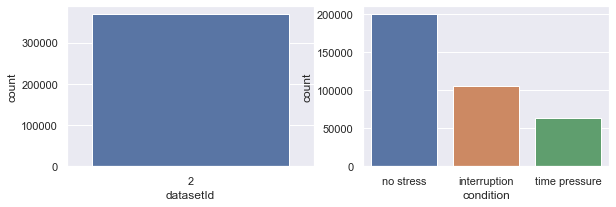

In [18]:
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(category_variables):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(result[col])

In [19]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity
from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model
from sklearn.linear_model import LogisticRegression #importing logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in result.columns:
    if result[column_name].dtype == object:
         result[column_name] = le.fit_transform(result[column_name])
    else:
         pass

In [21]:
X = result.drop(columns= ['HR'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = result.HR

y.head()

0    69.499952
1    64.363150
2    67.450066
3    68.809562
4    74.565728
Name: HR, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [23]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
regression_model.score(X_train, y_train)

0.980857934182759

In [25]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9810850993424685

In [26]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)


pred= regression_model.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

0.9564273742214953

In [27]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

0.9564273742214953

In [28]:
X = result.drop('HR', axis=1)
y = result['HR']

In [29]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [30]:
X.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,198548,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
1,185448,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
2,280786,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
3,80355,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
4,245440,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=1)
print(X_train.shape)
print(X_test.shape)

(258502, 36)
(110787, 36)


In [32]:
# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)


[110822 169225  26480 ... 248524 144440 177915]


In [33]:

from sklearn.neighbors import KNeighborsClassifier


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [35]:
pred1= knn.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred1)

3.677527307635306